# openpilot-lane-detection

#### 1. Load Dependency

In [7]:
import numpy as np
import math
import os
import cv2
from PIL import Image, ImageDraw
import datetime
import IPython

#### 2. Load Utils

In [4]:
from utils.PathModel import PathModel
# from utils.transform import *
from utils.postprocess import draw_lane

def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

#### 3. Run single image

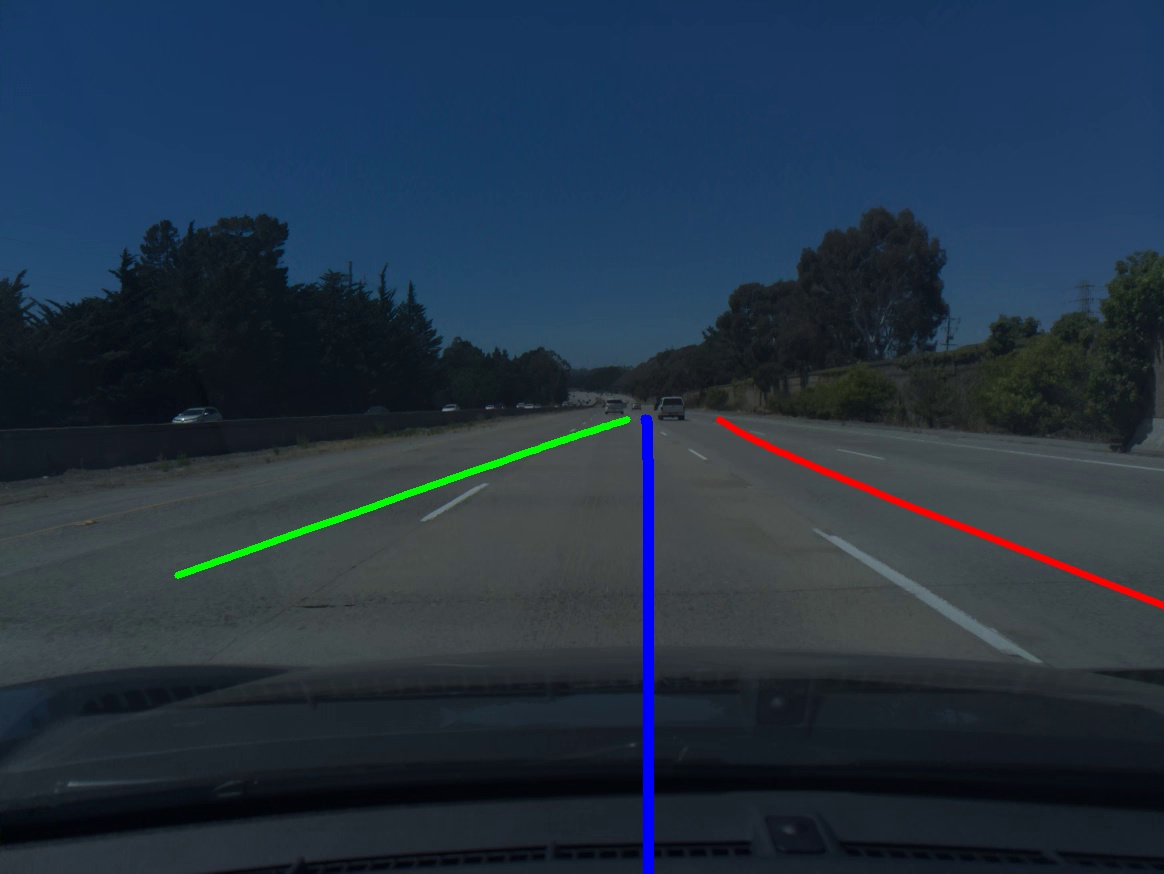

In [10]:
raw = np.array(np.fromfile('demo/res0.raw',dtype=np.float32))
model = PathModel(raw)
img = cv2.imread('demo/0.png')
res = draw_lane(img.copy(),model)
imshow(res)

#### 4. Run multiple images

In [12]:
pics = []
n = datetime.datetime.now()
for i in range(50):
    ii = str(i)
    a = np.fromfile('../data/results/res'+ii+'.raw',dtype=np.float32)
    a = np.array(a)
    model = PathModel(a)
    img = cv2.imread('../data/pics/'+ii+'.png')
    res = draw_lane(img.copy(),model)
    pics.append(res)
print(datetime.datetime.now()-n)

0:00:09.000812


#### 5. Save result to gif and show gif

In [14]:
from PIL import Image, ImageDraw
imgs = [Image.fromarray(cv2.cvtColor(cv2.resize(i,(i.shape[1]//2,i.shape[0]//2)),cv2.COLOR_BGR2RGB)) for i in pics]
imgs[0].save('demo/test.gif', format='GIF', append_images=imgs[1:], save_all=True, duration=70, loop=0)
from IPython.display import Image, display
X = Image(url='demo/test.gif')
display(X)